# Iteration 2 
This notebook demonstrates the `train` and `test` functions for the dataset. The focus is to reduce the number of Parameters from the last iteration. Add BatchNorm and dropouts

In [ ]:
# Import required modules
import torch
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from model_3 import Net
from train import train, train_losses, train_acc
from test import test, test_losses, test_acc
from torchsummary import summary

In [3]:
# Data transforms (use helpers from train.py)
from train import train_transforms, test_transforms

train_transforms = train_transforms(augment=False)
test_transforms = test_transforms()

In [4]:
# Dataset and DataLoader
train_dataset = datasets.MNIST('./data', train=True, download=True, transform=train_transforms)
test_dataset = datasets.MNIST('./data', train=False, download=True, transform=test_transforms)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

100%|██████████| 9.91M/9.91M [00:01<00:00, 5.54MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 133kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.26MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 11.9MB/s]


In [5]:
# Model, device, optimizer
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 26, 26]              90
       BatchNorm2d-2           [-1, 10, 26, 26]              20
              ReLU-3           [-1, 10, 26, 26]               0
            Conv2d-4           [-1, 10, 24, 24]             900
       BatchNorm2d-5           [-1, 10, 24, 24]              20
              ReLU-6           [-1, 10, 24, 24]               0
            Conv2d-7           [-1, 20, 22, 22]           1,800
       BatchNorm2d-8           [-1, 20, 22, 22]              40
              ReLU-9           [-1, 20, 22, 22]               0
          Dropout-10           [-1, 20, 22, 22]               0
        MaxPool2d-11           [-1, 20, 11, 11]               0
           Conv2d-12           [-1, 10, 11, 11]             200
      BatchNorm2d-13           [-1, 10, 11, 11]              20
             ReLU-14           [-1, 10,

In [6]:
# Training and Testing Loop
EPOCHS = 15
for epoch in range(EPOCHS):
    print(f"EPOCH: {epoch}")
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)

EPOCH: 0


Loss=0.03544504567980766 Batch_id=937 Accuracy=95.10: 100%|██████████| 938/938 [00:19<00:00, 48.91it/s]



Test set: Average loss: 0.0962, Accuracy: 9711/10000 (97.11%)

EPOCH: 1


Loss=0.2206190824508667 Batch_id=937 Accuracy=98.14: 100%|██████████| 938/938 [00:17<00:00, 52.23it/s]



Test set: Average loss: 0.0556, Accuracy: 9842/10000 (98.42%)

EPOCH: 2


Loss=0.17410673201084137 Batch_id=937 Accuracy=98.53: 100%|██████████| 938/938 [00:17<00:00, 53.58it/s]



Test set: Average loss: 0.0448, Accuracy: 9849/10000 (98.49%)

EPOCH: 3


Loss=0.0030504781752824783 Batch_id=937 Accuracy=98.79: 100%|██████████| 938/938 [00:18<00:00, 51.32it/s]



Test set: Average loss: 0.0408, Accuracy: 9873/10000 (98.73%)

EPOCH: 4


Loss=0.013658560812473297 Batch_id=937 Accuracy=98.81: 100%|██████████| 938/938 [00:17<00:00, 52.14it/s]



Test set: Average loss: 0.0491, Accuracy: 9851/10000 (98.51%)

EPOCH: 5


Loss=0.17040815949440002 Batch_id=937 Accuracy=98.91: 100%|██████████| 938/938 [00:17<00:00, 52.59it/s]



Test set: Average loss: 0.0486, Accuracy: 9848/10000 (98.48%)

EPOCH: 6


Loss=0.0818527340888977 Batch_id=937 Accuracy=99.02: 100%|██████████| 938/938 [00:18<00:00, 50.98it/s]



Test set: Average loss: 0.0635, Accuracy: 9816/10000 (98.16%)

EPOCH: 7


Loss=0.06923098862171173 Batch_id=937 Accuracy=99.07: 100%|██████████| 938/938 [00:17<00:00, 52.24it/s]



Test set: Average loss: 0.0470, Accuracy: 9860/10000 (98.60%)

EPOCH: 8


Loss=0.04506309702992439 Batch_id=937 Accuracy=99.11: 100%|██████████| 938/938 [00:18<00:00, 51.81it/s]



Test set: Average loss: 0.0372, Accuracy: 9889/10000 (98.89%)

EPOCH: 9


Loss=0.004711387678980827 Batch_id=937 Accuracy=99.19: 100%|██████████| 938/938 [00:17<00:00, 52.15it/s]



Test set: Average loss: 0.0419, Accuracy: 9880/10000 (98.80%)

EPOCH: 10


Loss=0.0024284622631967068 Batch_id=937 Accuracy=99.21: 100%|██████████| 938/938 [00:17<00:00, 53.73it/s]



Test set: Average loss: 0.0361, Accuracy: 9883/10000 (98.83%)

EPOCH: 11


Loss=0.009081117808818817 Batch_id=937 Accuracy=99.29: 100%|██████████| 938/938 [00:17<00:00, 52.87it/s]



Test set: Average loss: 0.0331, Accuracy: 9898/10000 (98.98%)

EPOCH: 12


Loss=0.21298742294311523 Batch_id=937 Accuracy=99.23: 100%|██████████| 938/938 [00:18<00:00, 51.77it/s]



Test set: Average loss: 0.0374, Accuracy: 9883/10000 (98.83%)

EPOCH: 13


Loss=0.1553550660610199 Batch_id=937 Accuracy=99.26: 100%|██████████| 938/938 [00:17<00:00, 52.88it/s]



Test set: Average loss: 0.0385, Accuracy: 9885/10000 (98.85%)

EPOCH: 14


Loss=0.2004866600036621 Batch_id=937 Accuracy=99.34: 100%|██████████| 938/938 [00:18<00:00, 51.51it/s]



Test set: Average loss: 0.0343, Accuracy: 9900/10000 (99.00%)



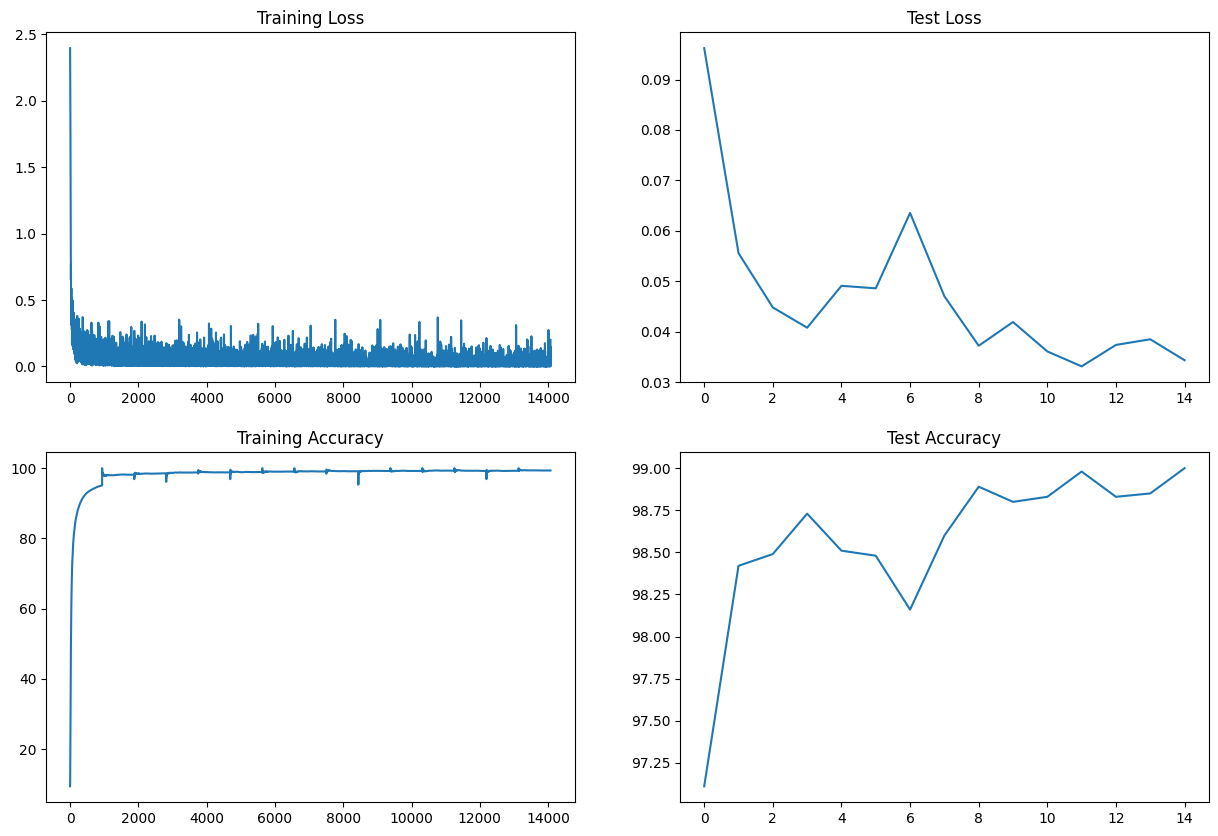

In [7]:
# Plotting results
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot([t.item() for t in train_losses])
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")
plt.show()